<h2>Introduction<h2>

Forest fires are a serious problem for the preservation of the Tropical Forests. Understanding the frequency of forest fires in a time series can help to take action to prevent them.
Brazil has the largest rainforest on the planet that is the Amazon rainforest.



This dataset report of the number of forest fires in Brazil divided by states. The series comprises the period of approximately 10 years (1998 to 2017). The data were obtained from kaggle 
https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil


<h3> Import Libraries <h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.max_columns = None

<h3> Data Importation and Exploration <h3>

In [3]:
df = pd.read_csv("amazon.csv", encoding="latin1")
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
rows, columns = df.shape
print(f"There are {rows} rows and {columns} columns in the dataset.")


There are 6454 rows and 5 columns in the dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [6]:
df.date = pd.to_datetime(df.date)

In [7]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [8]:
df.describe(include="all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Janeiro,NaN,NaN
freq,NaN,717,541,NaN,NaN
mean,2007.461729,NaN,NaN,108.293163,2007-06-18 18:28:53.622559488
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2002.000000,NaN,NaN,3.000000,2002-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.000000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,113.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [9]:
df.date.unique()

<DatetimeArray>
['1998-01-01 00:00:00', '1999-01-01 00:00:00', '2000-01-01 00:00:00',
 '2001-01-01 00:00:00', '2002-01-01 00:00:00', '2003-01-01 00:00:00',
 '2004-01-01 00:00:00', '2005-01-01 00:00:00', '2006-01-01 00:00:00',
 '2007-01-01 00:00:00', '2008-01-01 00:00:00', '2009-01-01 00:00:00',
 '2010-01-01 00:00:00', '2011-01-01 00:00:00', '2012-01-01 00:00:00',
 '2013-01-01 00:00:00', '2014-01-01 00:00:00', '2015-01-01 00:00:00',
 '2016-01-01 00:00:00', '2017-01-01 00:00:00']
Length: 20, dtype: datetime64[ns]

In [10]:
df.month.unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [11]:
df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [12]:
month_mapping = {
    'janeiro': 'January', 'fevereiro': 'February', 'março': 'March', 
    'abril': 'April', 'maio': 'May', 'junho': 'June', 
    'julho': 'July', 'agosto': 'August', 'setembro': 'September', 
    'outubro': 'October', 'novembro': 'November', 'dezembro': 'December'
}

df['month'] = df['month'].str.lower().map(month_mapping)


In [13]:
df

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


**Question 1:** Which month has the highest amount of fires?

In [14]:
highest_month = df.groupby("month")[["number"]].sum().sort_values(by="number", ascending=False)
highest_month

,number
month,
July,92326.113
October,88681.579
August,88050.435
November,85508.054
September,58578.305
December,57535.480
June,56010.675
January,47747.844
May,34731.363


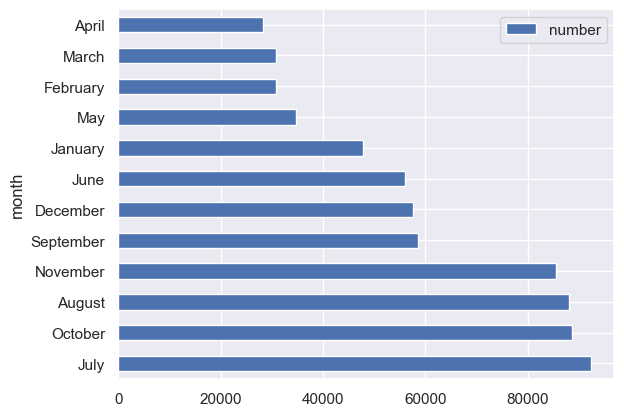

In [15]:
## Now lets visualize this
highest_month.plot(kind="barh");


Here we see that the month with the highest amount of fires is <b>July</b> and the month with the least amount of fires is <b>April</b>.

**Question 2**: The monthly distribution of the fires.


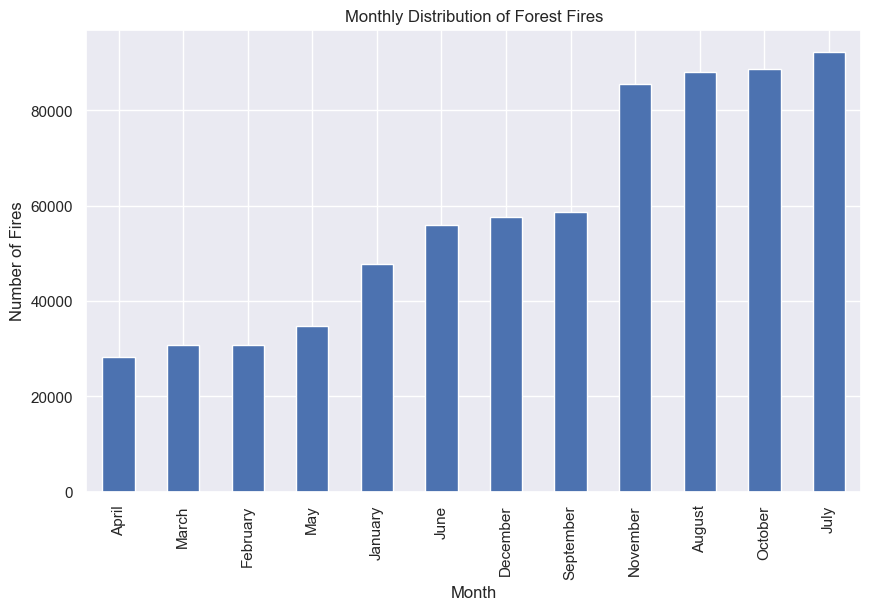

In [16]:
# Monthly sum of forest fires
monthly_fires = df.groupby('month')['number'].sum().sort_values()
plt.figure(figsize=(10, 6))
monthly_fires.plot(kind="bar")
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.title('Monthly Distribution of Forest Fires')
plt.show()


**Question 3:** Which state has the highest amount of fires? 

In [17]:
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

<Axes: xlabel='state'>

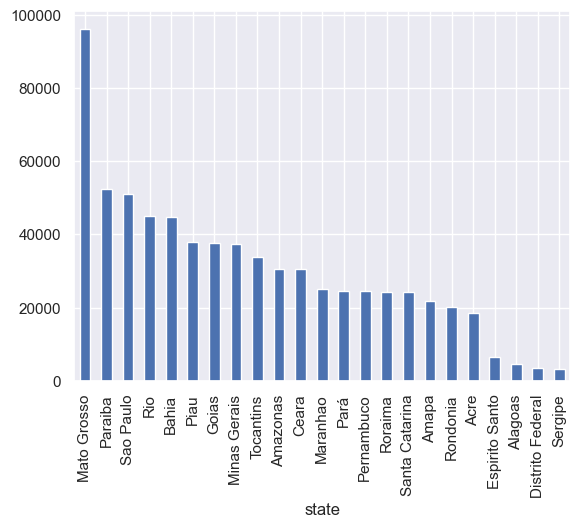

In [18]:
state_fires = df.groupby("state")["number"].sum()
state_fires.sort_values(ascending=False).plot(kind="bar")


In [19]:

state_fires.sort_values(ascending=False)

state
Mato Grosso         96246.028
Paraiba             52435.918
Sao Paulo           51121.198
Rio                 45160.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4644.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64